In [ ]:
!pip install rasterio

In [ ]:
import rasterio
from rasterio.fill import fillnodata
import rasterio.plot
import matplotlib
from matplotlib import pyplot
import numpy as np


In [ ]:
# Root Directory
Image_Segmentation_Path = '/content/drive/My Drive/Image Segmentation/'

# Inputs/Sources
Source_DEMs_Path = Image_Segmentation_Path + "Source DEMs/"
low_res_dem_path = Source_DEMs_Path + 'low_res_dem.tif'
high_res_dem_path = Source_DEMs_Path + 'high_res_dem.tif'

# Outputs/Destinations
Processed_DEMs_Path = Image_Segmentation_Path + "Processed DEMs/"
high_dem_interpolated = Processed_DEMs_Path + "high_dem_interpolated.tif"

# PNGs for the report
PNG_Path = Image_Segmentation_Path + "PNG/"

In [ ]:
def interpolate(src_file, dest_file, no_data_val=-32767.0, max_search_distance = 100, smoothing = 0):
  src_array = []
  dest_array = []
  with rasterio.open(src_file) as src:
    dest_profile = src.profile
    src_array = src.read(1)
    no_data_src_array = []
    no_data_src_array = src_array[src_array==no_data_val]
    dest_array = fillnodata(src_array, mask=src.read_masks(1), max_search_distance=1, smoothing_iterations=smoothing)
    no_data_dest_array = []
    no_data_dest_array = dest_array[dest_array==no_data_val]
    print("Still to fill = "+str(len(no_data_dest_array)))
    print("filled with this interpolation = "+str(len(no_data_src_array)-len(no_data_dest_array))+"\n")
  with rasterio.open(dest_file, 'w', **dest_profile) as dest:
    dest.write_band(1, dest_array)
  return dest_array

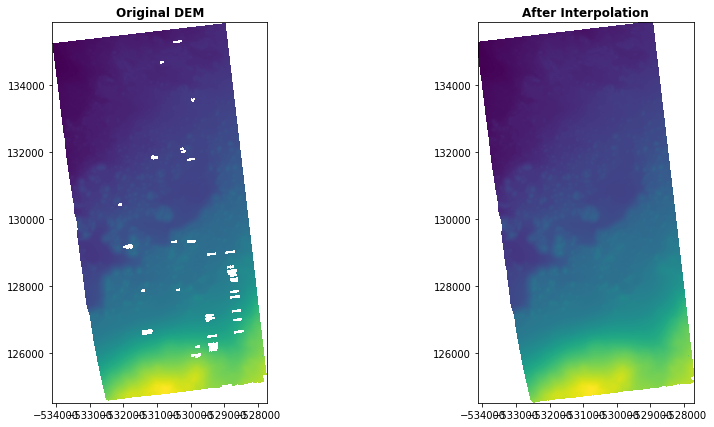

In [ ]:
fig, (ax_original, ax_filled) = pyplot.subplots(1,2, figsize=(14,7))

with rasterio.open(high_res_dem_path) as dem:
  rasterio.plot.show(dem, ax=ax_original, title='Original DEM')

with rasterio.open(high_dem_interpolated) as filled:
  rasterio.plot.show(filled, ax=ax_filled, title='After Interpolation')

# fig.savefig(dem_path+"Interpolation_3.png")

In [ ]:
# Not Needed Anymore
# def fill_completely (input_file, dest_file, smoothing_iterations = 0):
#     with rasterio.open(input_file) as input:
#       no_data_val = input.nodatavals[0]
#       profile = input.profile
#       input_array = input.read(1)
#       dest_array = input_array
#     #Create a copy as first output
#     with rasterio.open(dest_file, 'w', **profile) as dest:
#       dest.write_band(1, dest_array)
#     i=0
#     while no_data_val in dest_array:
#       # print("\niteration = "+str(i)+"\n")
#       dest_array = interpolate(src_file=dest_file,
#                                dest_file=dest_file,
#                                no_data_val=no_data_val,
#                                max_search_distance=1,
#                                smoothing=smoothing_iterations)
#       i+=1
  

In [ ]:
# iteration==50
# interpolate(src_file=high_dem_interpolated, dest_file=high_dem_interpolated, max_search_distance=1, smoothing=1)

In [ ]:
# Recheck that the smoothing value is compatible with the destination file name
# fill_completely(low_res_dem_path, low_res_dem_filled_smoothed, 3)